In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, StratifiedKFold

import pickle

##from Classification import Classification
##from Ensemble import Ensemble

C:\Users\lenovo\anaconda3\envs\SentimentCapstone\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [41]:
def conf_matrix(cm):

    plt.figure(figsize=(9,9))
    ax = sns.heatmap(cm,
                     annot= True,
                     fmt = '.4g',
                     cbar=0,
                     xticklabels=[1,2,3],
                     yticklabels=[1,2,3])

    plt.show()

In [3]:
x_train = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Trainn-Test\x_train_data_3labels.csv')
y_train = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Trainn-Test\y_train_data_3labels.csv')

In [4]:
x_test = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Trainn-Test\x_test_data_3labels.csv')
y_test = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Trainn-Test\y_test_data_3labels.csv')

In [5]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13208 entries, 0 to 13207
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   13208 non-null  int64
dtypes: int64(1)
memory usage: 103.3 KB


In [6]:
y_train.describe()

,label
count,13208.00000
mean,1.00212
std,0.89478
min,0.00000
25%,0.00000
50%,1.00000
75%,2.00000
max,2.00000


In [7]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13208 entries, 0 to 13207
Columns: 174 entries, access to would
dtypes: float64(174)
memory usage: 17.5 MB


In [9]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train['label'],test_size=.25,random_state=42)

In [ ]:
##skf = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)

Modelling

Multinomial Naive Bayes

Grid Search

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
###

parameters = {
'alpha': (1,0.1,0.01, 0.001, 0.0001, 0.00001),
'fit_prior' : (True,False),
}
clf = MultinomialNB().fit(x_train, y_train)
predicted= clf.predict(x_val)
##
grid_search= GridSearchCV(clf, parameters, cv=5)
grid_search.fit(x_train,y_train)
###
grid_search.best_estimator_

MultinomialNB(alpha=1)

Best Modell

In [12]:
NB_classifier = MultinomialNB(alpha=1, fit_prior=False)
NB_classifier.fit(x_train, y_train)

MultinomialNB(alpha=1, fit_prior=False)

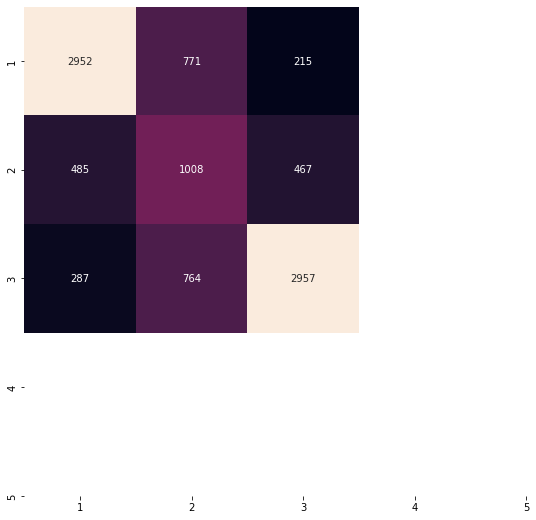

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = NB_classifier.predict(x_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
conf_matrix(cm)

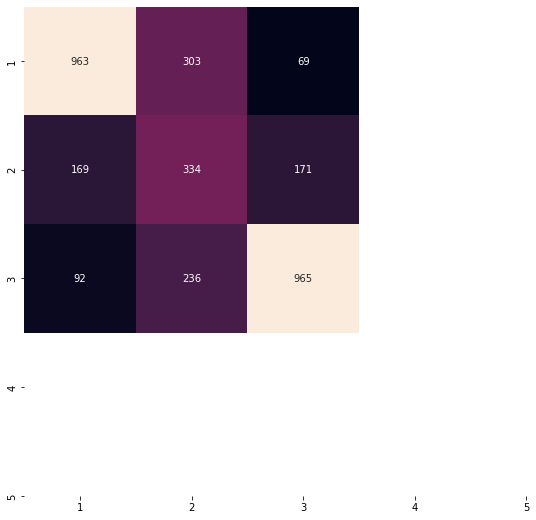

In [14]:
# Predicting the Test set results
y_predict_val = NB_classifier.predict(x_val)
cm = confusion_matrix(y_val, y_predict_val)
conf_matrix(cm)

In [15]:
print(classification_report(y_val, y_predict_val))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1335
           1       0.38      0.50      0.43       674
           2       0.80      0.75      0.77      1293

    accuracy                           0.69      3302
   macro avg       0.66      0.65      0.65      3302
weighted avg       0.71      0.69      0.69      3302



In [16]:
import sklearn.metrics as metrics
a = 'Multinomial Naive Bayes'
d = {'Model Name': [a],
             'Train Accuracy': [metrics.accuracy_score(y_train, y_predict_train)],
             'Validation Accuracy': [metrics.accuracy_score(y_val, y_predict_val)],
             'Accuracy Difference':[metrics.accuracy_score(y_train, y_predict_train)-metrics.accuracy_score(y_val, y_predict_val)]}
NB_scores_table = pd.DataFrame(data=d)
NB_scores_table

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Multinomial Naive Bayes,0.698264,0.685039,0.013224


# Logistic Regression

# Grid Search

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.722829 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.722795 (0.010385) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.722795 (0.010385) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.721045 (0.010202) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.722829 (0.010867) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.722829 (0.010793) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.720709 (0.010434) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.722762 (0.011038) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.722762 (0.010955) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.720743 (0.009811) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.717646 (0.007533) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.717680 (0.007566) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.713474 (0.008997) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.703547 (0.008660) with

In [58]:
#Best Model

In [18]:
LG_classifier = LogisticRegression(C=10, penalty='l2',solver='newton-cg')
LG_classifier.fit(x_train, y_train)

LogisticRegression(C=10, solver='newton-cg')

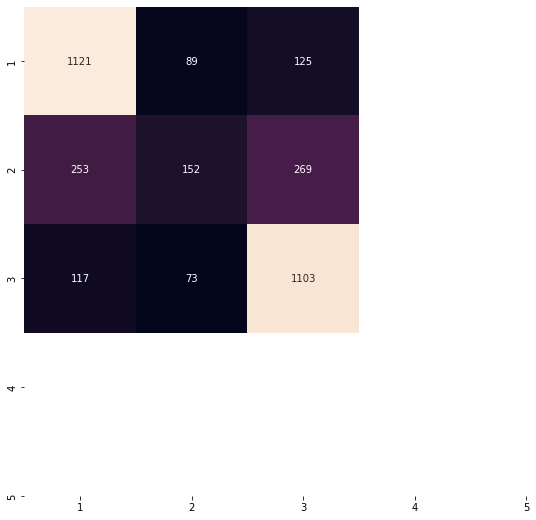

In [19]:
# Predicting the Val set results
y_predict_val = LG_classifier.predict(x_val)
cm = confusion_matrix(y_val, y_predict_val)
conf_matrix(cm)

In [20]:
print(classification_report(y_val, y_predict_val))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79      1335
           1       0.48      0.23      0.31       674
           2       0.74      0.85      0.79      1293

    accuracy                           0.72      3302
   macro avg       0.66      0.64      0.63      3302
weighted avg       0.69      0.72      0.69      3302



In [21]:
a = 'Logistic Regression'
d = {'Model Name': [a],
             'Train Accuracy': [metrics.accuracy_score(y_train, y_predict_train)],
             'Validation Accuracy': [metrics.accuracy_score(y_val, y_predict_val)],
             'Accuracy Difference':[metrics.accuracy_score(y_train, y_predict_train)-metrics.accuracy_score(y_val, y_predict_val)]}
LG_scores_table = pd.DataFrame(data=d)
LG_scores_table

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Logistic Regression,0.698264,0.719564,-0.0213


# KNN

# Grid Search

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.674037 using {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'distance'}
0.542129 (0.012513) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.542129 (0.012513) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.535466 (0.011250) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.543339 (0.009840) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.535094 (0.030171) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.567128 (0.020635) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.602125 (0.016541) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.611480 (0.016717) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.627464 (0.014717) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.633352 (0.014674) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.642169

# Best Model

In [23]:
KNN_classifier = KNeighborsClassifier(metric='euclidean', n_neighbors=19,weights='distance')
KNN_classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=19, weights='distance')

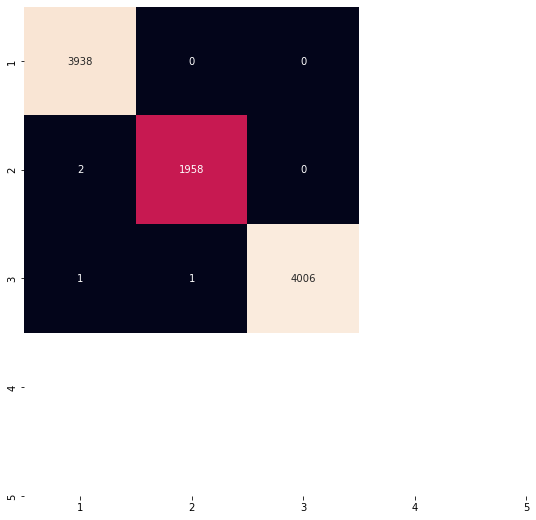

In [24]:
y_predict_train = KNN_classifier.predict(x_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
conf_matrix(cm)

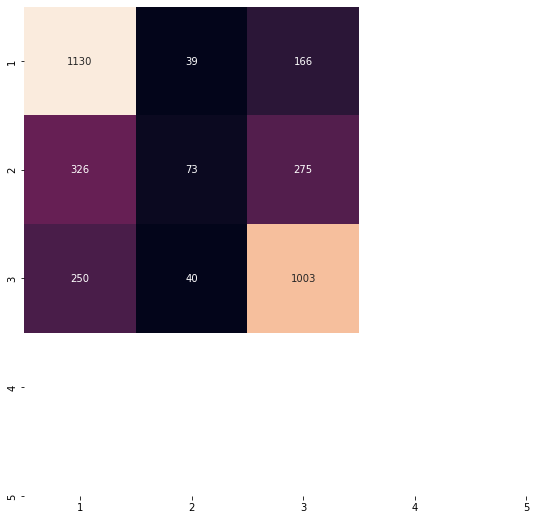

In [25]:
# Predicting the Val set results
y_predict_val = KNN_classifier.predict(x_val)
cm = confusion_matrix(y_val, y_predict_val)
conf_matrix(cm)

In [26]:
print(classification_report(y_val, y_predict_val))

              precision    recall  f1-score   support

           0       0.66      0.85      0.74      1335
           1       0.48      0.11      0.18       674
           2       0.69      0.78      0.73      1293

    accuracy                           0.67      3302
   macro avg       0.61      0.58      0.55      3302
weighted avg       0.64      0.67      0.62      3302



In [27]:
a = 'KNN'
d = {'Model Name': [a],
             'Train Accuracy': [metrics.accuracy_score(y_train, y_predict_train)],
             'Validation Accuracy': [metrics.accuracy_score(y_val, y_predict_val)],
             'Accuracy Difference':[metrics.accuracy_score(y_train, y_predict_train)-metrics.accuracy_score(y_val, y_predict_val)]}
KNN_scores_table = pd.DataFrame(data=d)
KNN_scores_table

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,KNN,0.999596,0.66808,0.331516


# Support Vector Machine

# Grid Search

In [28]:
from sklearn.svm import SVC
# define model and parameters
model = SVC()
kernel = ['poly']
gamma = ['scale']
degree = [2 , 3]
# define grid search
grid = dict(kernel=kernel,degree=degree,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.709167 using {'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
0.706541 (0.009899) with: {'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
0.709167 (0.010326) with: {'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}


In [30]:
from sklearn.svm import SVC
SVM_classifier = SVC(kernel='poly',degree=3,gamma='scale')
SVM_classifier.fit(x_train, y_train)

SVC(kernel='poly')

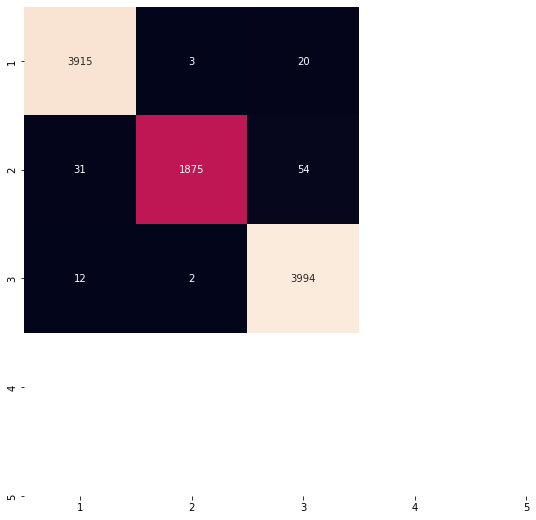

In [31]:
y_predict_train = SVM_classifier.predict(x_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
conf_matrix(cm)

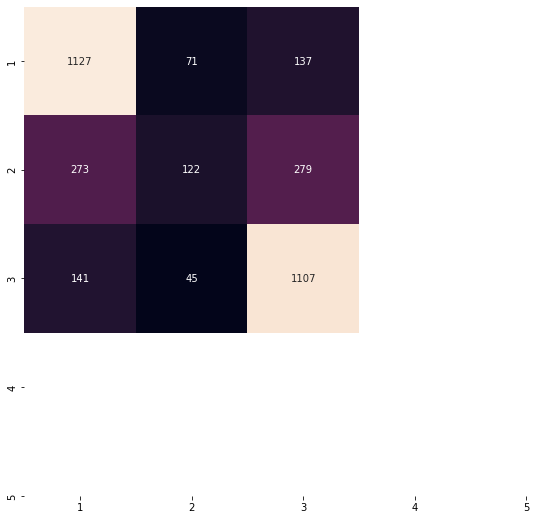

In [32]:
# Predicting the Val set results
y_predict_val = SVM_classifier.predict(x_val)
cm = confusion_matrix(y_val, y_predict_val)
conf_matrix(cm)

In [33]:
print(classification_report(y_val, y_predict_val))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78      1335
           1       0.51      0.18      0.27       674
           2       0.73      0.86      0.79      1293

    accuracy                           0.71      3302
   macro avg       0.66      0.63      0.61      3302
weighted avg       0.68      0.71      0.68      3302



In [34]:
a = 'SVM'
d = {'Model Name': [a],
             'Train Accuracy': [metrics.accuracy_score(y_train, y_predict_train)],
             'Validation Accuracy': [metrics.accuracy_score(y_val, y_predict_val)],
             'Accuracy Difference':[metrics.accuracy_score(y_train, y_predict_train)-metrics.accuracy_score(y_val, y_predict_val)]}
SVM_scores_table = pd.DataFrame(data=d)
SVM_scores_table

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,SVM,0.987684,0.713507,0.274177


# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.703850 using {'max_features': 'log2', 'n_estimators': 1000}
0.660542 (0.011368) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.697490 (0.008434) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.699374 (0.007167) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.660341 (0.012289) with: {'max_features': 'log2', 'n_estimators': 10}
0.702234 (0.007893) with: {'max_features': 'log2', 'n_estimators': 100}
0.703850 (0.008245) with: {'max_features': 'log2', 'n_estimators': 1000}


In [36]:
RF_classifier = RandomForestClassifier(max_features='log2',n_estimators=1000)
RF_classifier.fit(x_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=1000)

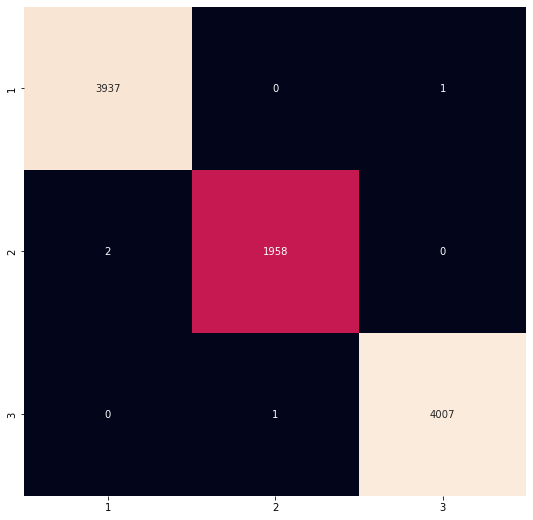

In [42]:
y_predict_train = RF_classifier.predict(x_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
conf_matrix(cm)

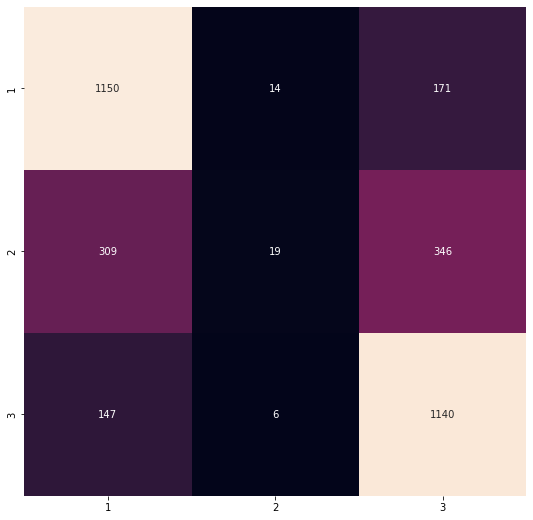

In [43]:
# Predicting the Val set results
y_predict_val = RF_classifier.predict(x_val)
cm = confusion_matrix(y_val, y_predict_val)
conf_matrix(cm)

In [39]:
print(classification_report(y_val, y_predict_val))

              precision    recall  f1-score   support

           0       0.72      0.86      0.78      1335
           1       0.49      0.03      0.05       674
           2       0.69      0.88      0.77      1293

    accuracy                           0.70      3302
   macro avg       0.63      0.59      0.54      3302
weighted avg       0.66      0.70      0.63      3302



In [40]:
a = 'Random Forest'
d = {'Model Name': [a],
             'Train Accuracy': [metrics.accuracy_score(y_train, y_predict_train)],
             'Validation Accuracy': [metrics.accuracy_score(y_val, y_predict_val)],
             'Accuracy Difference':[metrics.accuracy_score(y_train, y_predict_train)-metrics.accuracy_score(y_val, y_predict_val)]}
RF_scores_table = pd.DataFrame(data=d)
RF_scores_table

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Random Forest,0.999596,0.699273,0.300323


# Bagged Decision Trees

In [44]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

KeyboardInterrupt: 

In [57]:
from sklearn.ensemble import BaggingClassifier
BC_classifier = BaggingClassifier(n_estimators=100)
BC_classifier.fit(x_train, y_train)

BaggingClassifier(n_estimators=100)

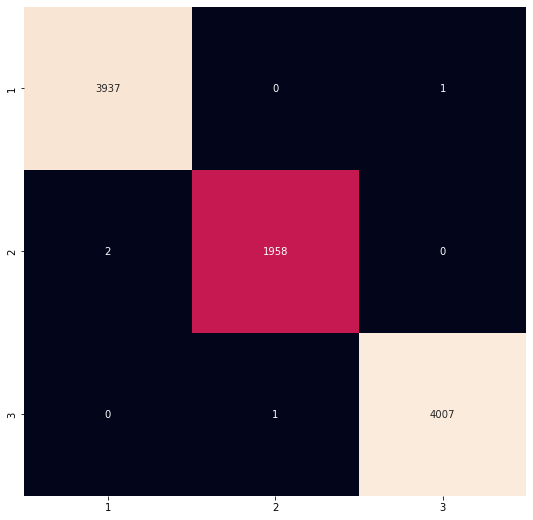

In [58]:
y_predict_train = BC_classifier.predict(x_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
conf_matrix(cm)

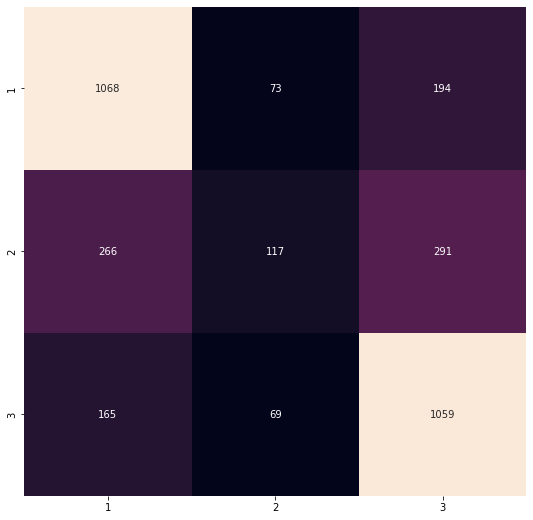

In [59]:
# Predicting the Val set results
y_predict_val = BC_classifier.predict(x_val)
cm = confusion_matrix(y_val, y_predict_val)
conf_matrix(cm)

In [ ]:
print(classification_report(y_val, y_predict_val))

In [61]:
a = 'Bagged Decision Trees'
d = {'Model Name': [a],
             'Train Accuracy': [metrics.accuracy_score(y_train, y_predict_train)],
             'Validation Accuracy': [metrics.accuracy_score(y_val, y_predict_val)],
             'Accuracy Difference':[metrics.accuracy_score(y_train, y_predict_train)-metrics.accuracy_score(y_val, y_predict_val)]}
BC_scores_table = pd.DataFrame(data=d)
BC_scores_table

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Bagged Decision Trees,0.999596,0.679588,0.320008


# Ridge Classifier

In [62]:
from sklearn.linear_model import RidgeClassifier
# define models and parameters
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.718320 using {'alpha': 0.3}
0.718219 (0.008878) with: {'alpha': 0.1}
0.718185 (0.008779) with: {'alpha': 0.2}
0.718320 (0.008772) with: {'alpha': 0.3}
0.718320 (0.008725) with: {'alpha': 0.4}
0.718252 (0.008756) with: {'alpha': 0.5}
0.718185 (0.008804) with: {'alpha': 0.6}
0.718151 (0.008786) with: {'alpha': 0.7}
0.718050 (0.008820) with: {'alpha': 0.8}
0.718017 (0.008898) with: {'alpha': 0.9}
0.718017 (0.008984) with: {'alpha': 1.0}


In [80]:
RG_classifier = RidgeClassifier(alpha=0.3)
RG_classifier.fit(x_train, y_train)

RidgeClassifier(alpha=0.3)

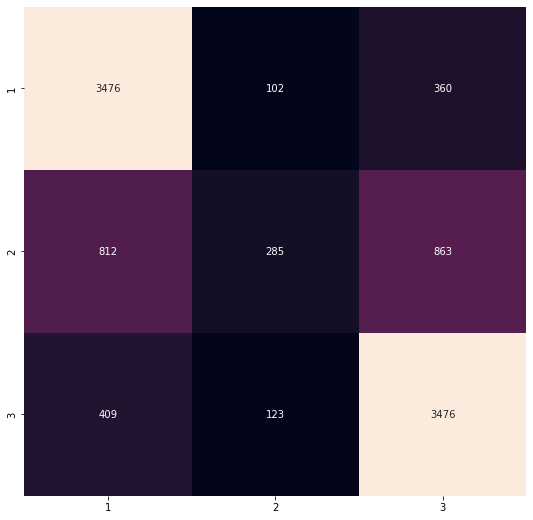

In [81]:
y_predict_train = RG_classifier.predict(x_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
conf_matrix(cm)

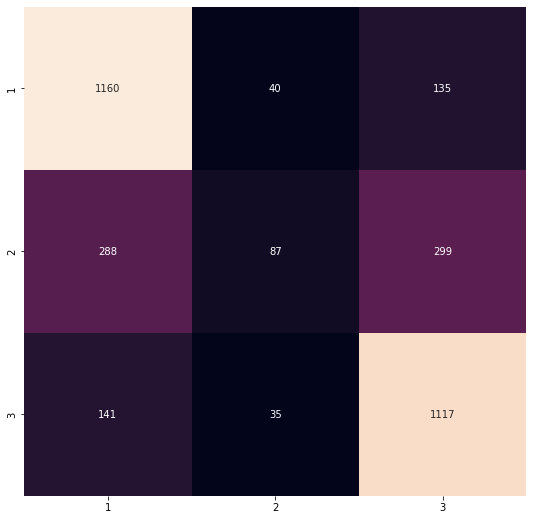

In [82]:
# Predicting the Val set results
y_predict_val = RG_classifier.predict(x_val)
cm = confusion_matrix(y_val, y_predict_val)
conf_matrix(cm)

In [83]:
print(classification_report(y_val, y_predict_val))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79      1335
           1       0.54      0.13      0.21       674
           2       0.72      0.86      0.79      1293

    accuracy                           0.72      3302
   macro avg       0.66      0.62      0.60      3302
weighted avg       0.69      0.72      0.67      3302



In [84]:
a = 'Ridge Classifier'
d = {'Model Name': [a],
             'Train Accuracy': [metrics.accuracy_score(y_train, y_predict_train)],
             'Validation Accuracy': [metrics.accuracy_score(y_val, y_predict_val)],
             'Accuracy Difference':[metrics.accuracy_score(y_train, y_predict_train)-metrics.accuracy_score(y_val, y_predict_val)]}
RG_scores_table = pd.DataFrame(data=d)
RG_scores_table

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Ridge Classifier,0.730567,0.71593,0.014638


# Stochastic Gradient Boosting

In [103]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
n_estimators = [10, 100]
learning_rate = [0.01, 0.1]
subsample = [1.0]
max_depth = [3, 7]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

KeyboardInterrupt: 

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,subsample=1.0,max_depth=3)
GBC_classifier.fit(x_train, y_train)

GradientBoostingClassifier()

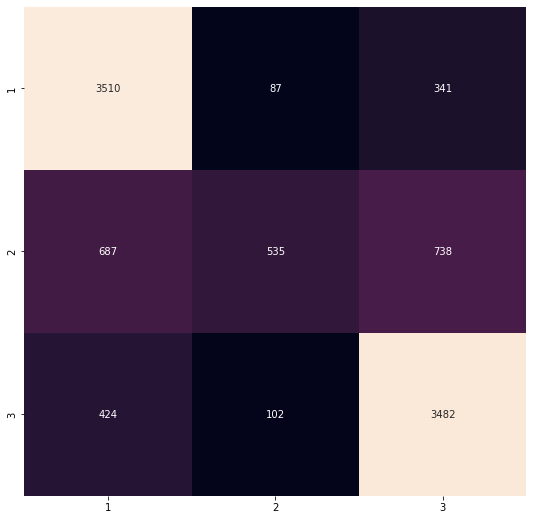

In [105]:
y_predict_train = GBC_classifier.predict(x_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
conf_matrix(cm)

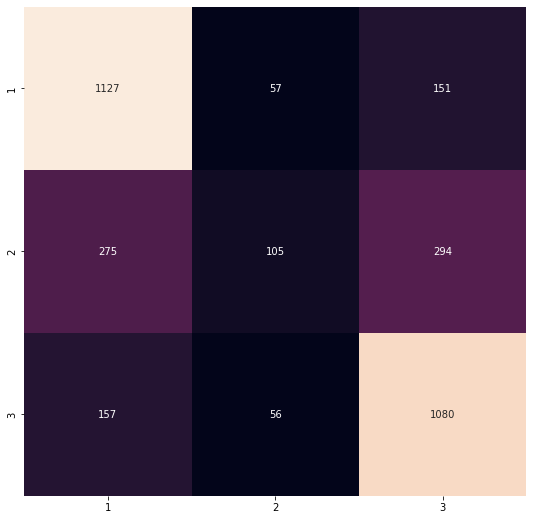

In [106]:
# Predicting the Val set results
y_predict_val = GBC_classifier.predict(x_val)
cm = confusion_matrix(y_val, y_predict_val)
conf_matrix(cm)

In [101]:
print(classification_report(y_val, y_predict_val))

              precision    recall  f1-score   support

           0       0.61      0.83      0.70      1335
           1       0.32      0.01      0.03       674
           2       0.65      0.72      0.68      1293

    accuracy                           0.62      3302
   macro avg       0.53      0.52      0.47      3302
weighted avg       0.57      0.62      0.56      3302



In [108]:
a = 'Stochastic Gradient Boosting'
d = {'Model Name': [a],
             'Train Accuracy': [metrics.accuracy_score(y_train, y_predict_train)],
             'Validation Accuracy': [metrics.accuracy_score(y_val, y_predict_val)],
             'Accuracy Difference':[metrics.accuracy_score(y_train, y_predict_train)-metrics.accuracy_score(y_val, y_predict_val)]}
GBC_scores_table = pd.DataFrame(data=d)
GBC_scores_table

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Stochastic Gradient Boosting,0.759843,0.700182,0.059661


# Bring all model one DataFrame

In [109]:
all_models = pd.concat([KNN_scores_table,
                        NB_scores_table,
                        LG_scores_table,
                        SVM_scores_table,
                        RF_scores_table,
                        BC_scores_table,
                        RG_scores_table,
                        GBC_scores_table],
                        axis=0)
all_models

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,KNN,0.999596,0.668080,0.331516
0,Multinomial Naive Bayes,0.698264,0.685039,0.013224
0,Logistic Regression,0.698264,0.719564,-0.021300
0,SVM,0.987684,0.713507,0.274177
0,Random Forest,0.999596,0.699273,0.300323
0,Bagged Decision Trees,0.999596,0.679588,0.320008
0,Ridge Classifier,0.730567,0.715930,0.014638
0,Stochastic Gradient Boosting,0.759843,0.700182,0.059661
